In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance

gc.enable()

video_start = '20190501'#'20190327'#'20181220' #YYYYMMDD
video_end = '20190501'#'20190327'#'20181220' #YYYYMMDD
data_path = '/data/'
sensor_list = ["wifi"]#["gyro","acc2","acc_w","wifi","magnetic"]

temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

loc_list = ["kit","din","bat","str","bed"]
swaps = 0

2019/05/01
2019/05/01


In [66]:
session_list = []
with open('capture_time.csv') as csvfile: #read session data from capture_time.csv
    readCSV = csv.reader(csvfile, delimiter='-')
    line_no = 0
    print "The data sessions taken during the start and end dates"
    for row in readCSV:
        if row[0] != '' and row[1] != '': #Check if both start and end times of each row exists
            starttime = datetime.strptime(row[0],'%Y/%m/%d %H:%M:%S.%f')
            endtime = datetime.strptime(row[1],'%Y/%m/%d %H:%M:%S.%f')
            #print starttime.date()
            if starttime.date() == video_startdatte.date() and endtime.date() == video_enddate.date(): #Check if sessions available which matches the startdate and enddate
                line_no = line_no + 1
                print "(", line_no, ")", "\t", starttime, "-", endtime, "\t", (endtime-starttime).seconds
                session_list.append(row[0] + "-" + row[1])

print "Please input the session number. Confirm the start and end times using the video."
session = raw_input("Session ") 
print "You have chosen the session ", session

The data sessions taken during the start and end dates
( 1 ) 	2019-05-01 16:41:05.611000 - 2019-05-01 16:41:13.163000 	7
( 2 ) 	2019-05-01 16:42:40.785000 - 2019-05-01 16:43:10.407000 	29
( 3 ) 	2019-05-01 16:43:45.472000 - 2019-05-01 16:44:57.964000 	72
( 4 ) 	2019-05-01 16:54:00.370000 - 2019-05-01 16:54:34.154000 	33
( 5 ) 	2019-05-01 17:09:03.935000 - 2019-05-01 17:13:19.206000 	255
( 6 ) 	2019-05-01 17:34:35.146000 - 2019-05-01 17:38:39.256000 	244
( 7 ) 	2019-05-01 17:54:56.137000 - 2019-05-01 17:58:14.905000 	198
( 8 ) 	2019-05-01 17:59:27.842000 - 2019-05-01 18:03:30.776000 	242
( 9 ) 	2019-05-01 18:32:31.120000 - 2019-05-01 18:36:21.541000 	230
( 10 ) 	2019-05-01 18:45:58.958000 - 2019-05-01 18:49:56.742000 	237
Please input the session number. Confirm the start and end times using the video.
Session 5
You have chosen the session  5


In [67]:
session_starttime = datetime.strptime(session_list[int(session)-1][0:23],'%Y/%m/%d %H:%M:%S.%f')
session_endtime = datetime.strptime(session_list[int(session)-1][24:47],'%Y/%m/%d %H:%M:%S.%f')
print "Start and end times for your selected session are as follows."
print "Start time = ",session_starttime
print "End time = ",session_endtime

Start and end times for your selected session are as follows.
Start time =  2019-05-01 17:09:03.935000
End time =  2019-05-01 17:13:19.206000


# Read WiFi data

In [68]:
df_acc2 = pd.DataFrame()
df_acc_w = pd.DataFrame()
df_gyro = pd.DataFrame()
df_magnetic = pd.DataFrame()
results = []

for sensor in sensor_list:
    df = pd.DataFrame()
    for data_filename in os.listdir("data/" + sensor + "/" + video_start): #read data files from data folder
        data_filename = os.path.splitext(data_filename)[0]
        #print datetime.strptime(session_starttime.strftime('%Y/%m/%d %H:%M:%S.%f')[:19],'%Y/%m/%d %H:%M:%S')


        data_filename_datetime = datetime.strptime(data_filename[0:15],'%Y%m%d_%H%M%S')
        #print data_filename_datetime
        if data_filename_datetime >= datetime.strptime(session_starttime.strftime('%Y/%m/%d %H:%M:%S.%f')[:19],'%Y/%m/%d %H:%M:%S') and data_filename_datetime <= datetime.strptime(session_endtime.strftime('%Y/%m/%d %H:%M:%S.%f')[:19],'%Y/%m/%d %H:%M:%S'): #check if the file is in the selected session
            #samplerate, data = wavfile.read(stereo_path + wav_filename +'.wav')
            print "Reading file", data_filename
            if sensor!="wifi":
                df_temp = pd.read_csv("data/" + sensor + "/" + video_start + "/" + data_filename + ".csv")
                #df.index = df['time']
                df_temp.set_index('time', inplace = True)
                #display(df_temp.head())
                df = df.append(df_temp, ignore_index=False)
                
            if sensor=="wifi":
                with open("data/" + sensor + "/" + video_start + "/" + data_filename + ".csv") as csvfile:
                    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
                    for row in spamreader:
                        results.append(row)


    if sensor=="acc2":
        df_acc2=df
    if sensor=="acc_w":
        df_acc_w=df
    if sensor=="gyro":
        df_gyro=df
    if sensor=="magnetic":
        df_magnetic=df
    if sensor=="wifi":
        df_wifi=df
            
#df_acc2 = df_acc2.sort_values(by='time')
#df_acc_w = df_acc_w.sort_values(by='time')
#df_gyro = df_gyro.sort_values(by='time')
#df_magnetic = df_magnetic.sort_values(by='time')

df_acc2.sort_index(inplace=True)
df_acc_w.sort_index(inplace=True)
df_gyro.sort_index(inplace=True)
df_magnetic.sort_index(inplace=True)
#df_wifi = df_wifi.sort_values(by='time')
print "All the data files have been read, appended an sorted according to the time stamps"

Reading file 20190501_171300
Reading file 20190501_171000
Reading file 20190501_171100
Reading file 20190501_171200
All the data files have been read, appended an sorted according to the time stamps


# Read acc_pca

In [69]:
env_root = "/env/"
acc = pd.read_csv("env/" + session + "/" + "acc_pca")

# Read labels

In [70]:
labels = pd.read_csv("env/" + session + "/" + "labels")

In [71]:
labels.drop(["Unnamed: 0"], axis=1)

,0
0,bed
1,bed
2,bed
3,bed
4,bed
5,bed
6,bed
7,bed
8,bed
9,bed


In [72]:
len(acc)

22920

In [73]:
df2 = labels.tail(len(acc)-len(labels))

In [74]:
labels = pd.concat([labels,df2],ignore_index=True)

In [75]:
len(labels)

22920

In [76]:
labels.drop(["Unnamed: 0"], axis=1)

,0
0,bed
1,bed
2,bed
3,bed
4,bed
5,bed
6,bed
7,bed
8,bed
9,bed


In [77]:
labels.index = acc["time"]
labels.drop(["Unnamed: 0"], axis=1,inplace=True)

In [78]:
labels

,0
time,
2019-05-01 17:09:30.002,bed
2019-05-01 17:09:30.012,bed
2019-05-01 17:09:30.022,bed
2019-05-01 17:09:30.032,bed
2019-05-01 17:09:30.042,bed
2019-05-01 17:09:30.052,bed
2019-05-01 17:09:30.062,bed
2019-05-01 17:09:30.072,bed
2019-05-01 17:09:30.082,bed


In [79]:
acc.index = acc["time"]

In [80]:
acc

,time,0
time,,
2019-05-01 17:09:30.002,2019-05-01 17:09:30.002,15.711148
2019-05-01 17:09:30.012,2019-05-01 17:09:30.012,15.444676
2019-05-01 17:09:30.022,2019-05-01 17:09:30.022,14.954455
2019-05-01 17:09:30.032,2019-05-01 17:09:30.032,14.522117
2019-05-01 17:09:30.042,2019-05-01 17:09:30.042,14.225403
2019-05-01 17:09:30.052,2019-05-01 17:09:30.052,14.126150
2019-05-01 17:09:30.062,2019-05-01 17:09:30.062,13.984448
2019-05-01 17:09:30.072,2019-05-01 17:09:30.072,13.745804
2019-05-01 17:09:30.082,2019-05-01 17:09:30.082,13.582814


In [81]:
acc.drop(["time"], axis=1,inplace=True)

In [82]:
rep = 0
for locs in loc_list:
    print locs, rep
    labels.replace(locs,rep,inplace=True)
    rep = rep + 1

kit 0
din 1
bat 2
str 3
bed 4


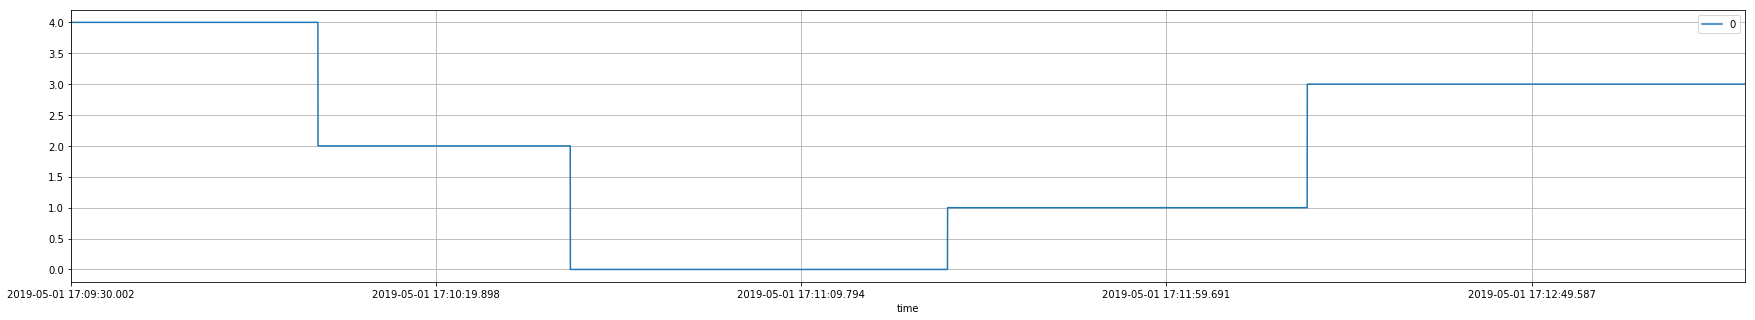

In [83]:
labels.plot(figsize = (30,5),grid=1,xlim=[0,len(labels)])

# WiFi data processing

In [84]:
wifi_timestamps=set([])
mac_index=set([])
for i in range (0,len(results)-1):
    #print str(results[i][0]).split(",")[0].replace(" ", "")
    wifi_timestamps.add(str(results[i][0]).split(",")[0].replace(" ", ""))
    for j in range (1,len(results[i])-1):
        #print str(results[i][j]).split(",")[1][7:].replace(" ", ""), "\t", str(results[i][j]).split(",")[3][7:].replace(" ", "")
        mac_index.add(str(results[i][j]).split(",")[1][7:].replace(" ", ""))
        
wifi_timestamps.remove("time")
df_wifi = pd.DataFrame(columns=mac_index,index=wifi_timestamps)
df_wifi.sort_index(inplace=True)

for x in range (0,len(results)-1):
    #print str(results[x][0]).split(",")[0].replace(" ", "")
    for y in range (1,len(results[x])-1):
        #print str(results[x][y]).split(",")[1][7:].replace(" ", ""), "\t", str(results[x][y]).split(",")[3][7:].replace(" ", "")
        df_wifi.set_value(index=str(results[x][0]).split(",")[0].replace(" ", ""), col=str(results[x][y]).split(",")[1][7:].replace(" ", ""), value=int(str(results[x][y]).split(",")[3][7:].replace(" ", "")))
        
df_wifi.fillna(value=-100, inplace=True)
#df_wifi

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


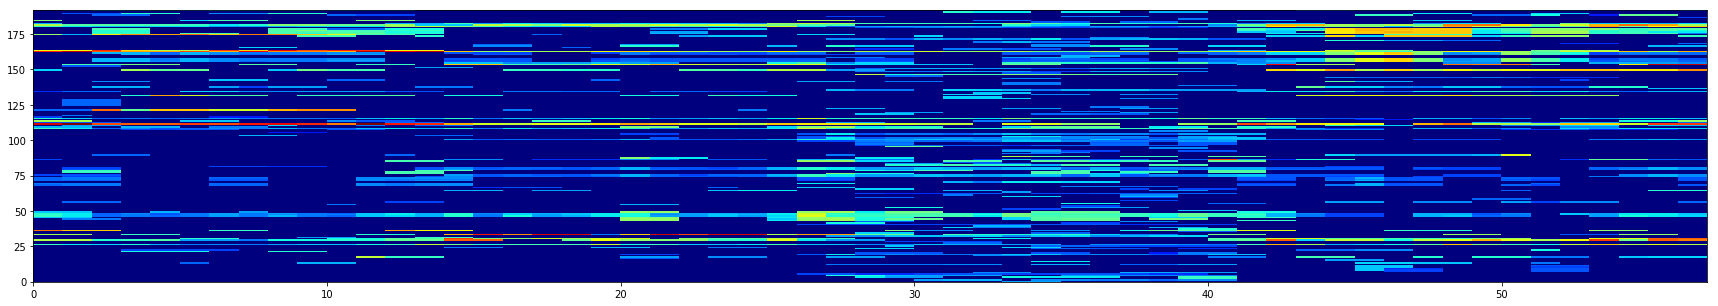

In [85]:
plt.figure(figsize=(30,5))
plt.imshow(df_wifi.T.astype(float),cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(wifi_timestamps),0,len(mac_index)], aspect='auto')
plt.savefig("ap.png")

In [86]:
wifi_std = pd.DataFrame()
wifi_std = df_wifi.std(axis=0)

for x in range(0,len(wifi_std)):
    if wifi_std[x] < 1.0: 
        #print wifi_std.index[x]
        df_wifi.drop(wifi_std.index[x], axis=1, inplace=True)

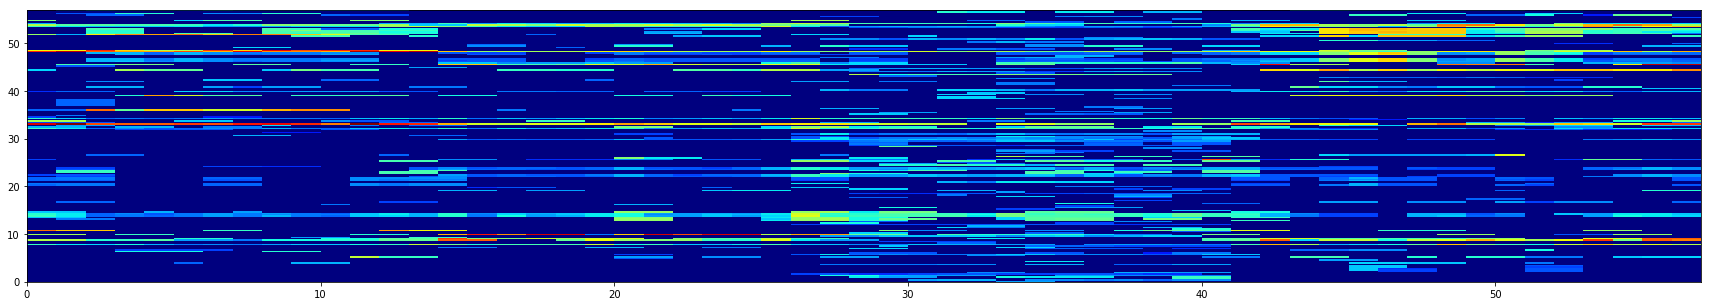

In [87]:
plt.figure(figsize=(30,5))
plt.imshow(df_wifi.T.astype(float),cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(wifi_timestamps),0,len(df_wifi)], aspect='auto')
#plt.savefig("ap.png")

# Wifi distance matrix calculation

In [88]:
wifi_level = df_wifi.values

In [89]:
dist1 = 0
wifi_dist_mat = []
wid, leng = wifi_level.shape

num_aps = float(wid)
for scans1 in range(0,len(wifi_level)):
    dist_row = []
    for scans2 in range(0,len(wifi_level)):
        dist_row.append(float(sum(np.abs(wifi_level[scans1,:]-wifi_level[scans2,:])))/num_aps)
    wifi_dist_mat.append(dist_row)    



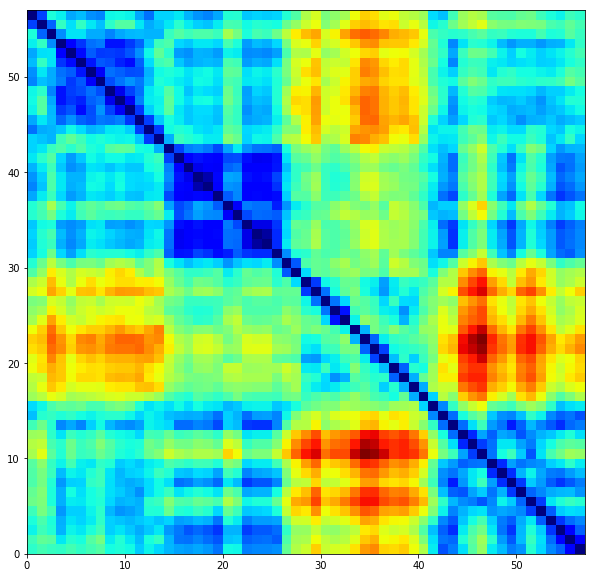

In [90]:
plt.figure(figsize=(10,10))
plt.imshow(wifi_dist_mat,cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(wifi_level),0,len(wifi_level)], aspect='auto')
#plt.savefig("ap.png")

In [91]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

wifi_dist_array = ssd.squareform(wifi_dist_mat)

Z = linkage(wifi_dist_array, method='ward', metric='euclidean', optimal_ordering=True)

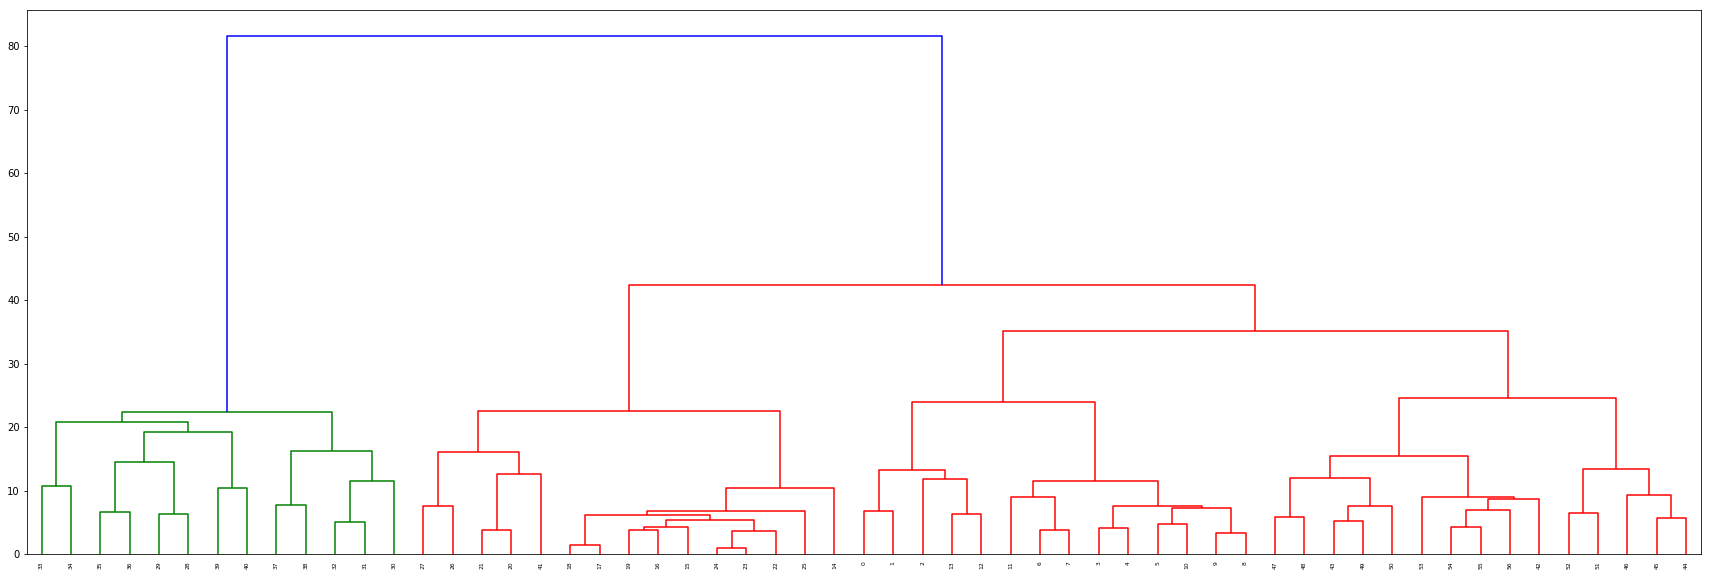

In [92]:
plt.figure(figsize=(30,10))
dn = dendrogram(Z)
plt.show()

In [93]:
t = 0.3*max(Z[:,2])
place_clusters = fcluster(Z, t, criterion="distance")

In [94]:
place_clusters = pd.DataFrame(place_clusters, index=df_wifi.index)

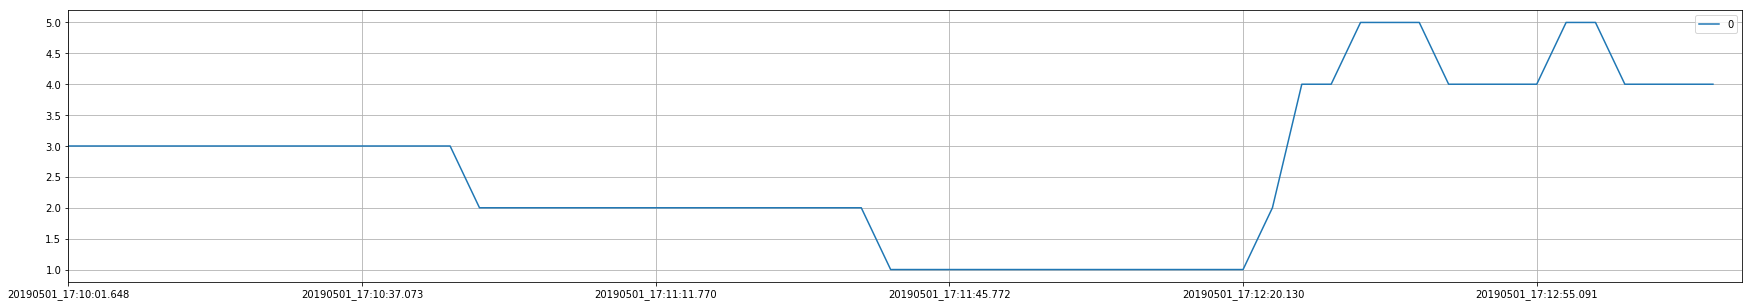

In [95]:
place_clusters.plot(figsize = (30,5),grid=1,xlim=[0,len(place_clusters)])

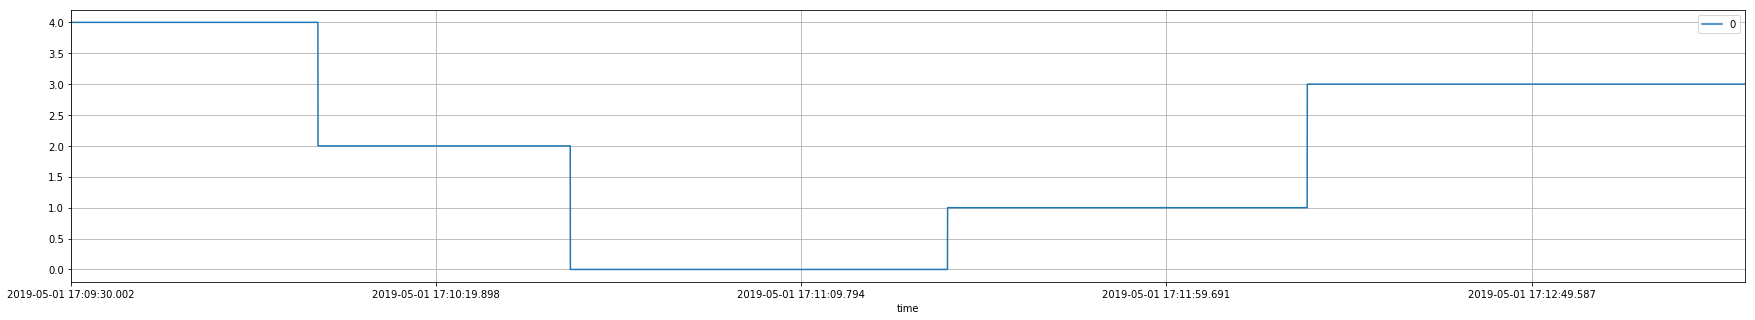

In [96]:
labels.plot(figsize = (30,5),grid=1,xlim=[0,len(labels)])

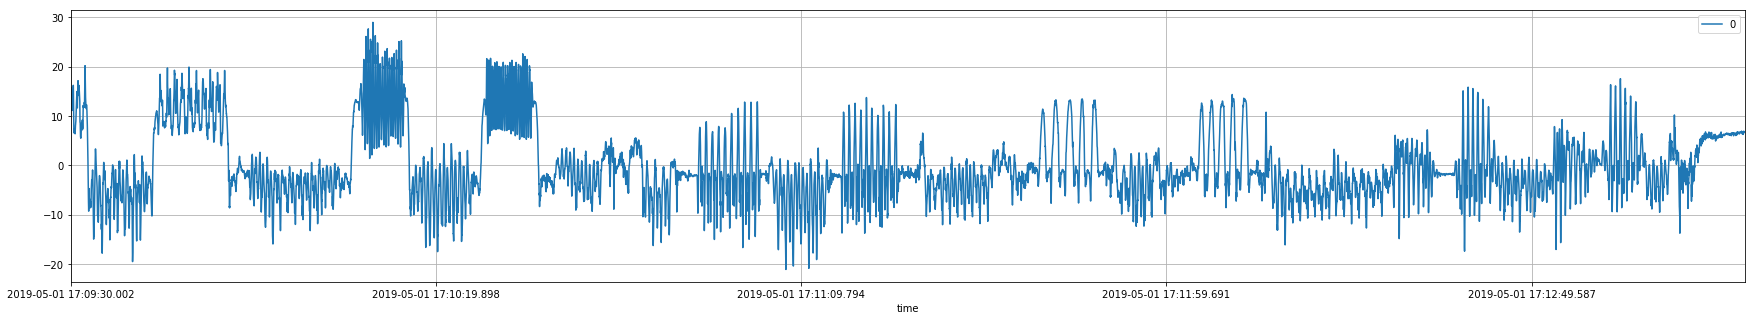

In [97]:
acc.plot(figsize = (30,5),grid=1,xlim=[0,len(acc)])

# WiFi resampling

## Resampling

In [98]:
def resampling_trimming(sen1, sen2):
    max_len_sen = sen1
    min_len_sen = sen2
    
    if len(max_len_sen) <= len(sen2):
        max_len_sen = sen2
        min_len_sen = sen1
        
    # Remove dataframes with timestamps that doesn't match with the given datetime format
    for stmp in min_len_sen.index:
        try:
            datetime.strptime(stmp,'%Y%m%d_%H:%M:%S.%f')
        except ValueError:
            min_len_sen.drop(stmp,axis=0,inplace=True)
            #raise ValueError("Incorrect data format, should be YYYY-MM-DD")

    for stmp2 in max_len_sen.index:
        try:
            datetime.strptime(stmp2,'%Y%m%d_%H:%M:%S.%f')
        except ValueError:
            max_len_sen.drop(stmp2,axis=0,inplace=True)
            

    #Triming off the excess timestamps from the frontend of the sensordata
    print "acc2 start = ",max_len_sen.index[0]
    print "acc_w start = ",min_len_sen.index[0]

    print "Trimming..."

    if pd.to_datetime(max_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f') > pd.to_datetime(min_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f'): #if acc2 starts after acc_w
        min_timestamp = min(pd.to_datetime(min_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(max_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f'))) #find the closest timestamp in acc2 to acc_w[0]
        for items in min_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items < min_timestamp:
                min_len_sen.drop(str(items),inplace=True)

    else: 
        min_timestamp = min(pd.to_datetime(max_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(min_len_sen.index[0],format='%Y%m%d_%H:%M:%S.%f')))
        for items in max_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items < min_timestamp:
                max_len_sen.drop(str(items),inplace=True)

    print "acc2 start = ",max_len_sen.index[0]
    print "acc_w start = ",min_len_sen.index[0]      
    print "\n"

    
    #Triming off the excess timestamps from the backend of the sensordata
    print "acc2 end = ",max_len_sen.index[len(max_len_sen)-1]
    print "acc_w end = ",min_len_sen.index[len(min_len_sen)-1]

    print "Trimming..."

    if pd.to_datetime(max_len_sen.index[len(max_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f') < pd.to_datetime(min_len_sen.index[len(min_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f'): #if acc2 ends before acc_w
        min_timestamp = min(pd.to_datetime(min_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(max_len_sen.index[len(max_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f'))) #find the closest timestamp in acc2 to acc_w[0]
        for items in min_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items > min_timestamp:
                min_len_sen.drop(str(items),inplace=True)

    else: 
        min_timestamp = min(pd.to_datetime(max_len_sen.index,format='%Y%m%d_%H:%M:%S.%f'), key=lambda x:abs(x-pd.to_datetime(min_len_sen.index[len(min_len_sen)-1],format='%Y%m%d_%H:%M:%S.%f')))
        for items in max_len_sen.index:
            dt_items = datetime.strptime(items,'%Y%m%d_%H:%M:%S.%f')
            if dt_items > min_timestamp:
                max_len_sen.drop(str(items),inplace=True)

    print "acc2 end = ",max_len_sen.index[len(max_len_sen)-1]
    print "acc_w end = ",min_len_sen.index[len(min_len_sen)-1]
    
    return max_len_sen, min_len_sen

In [99]:
def resampling_repeating(sen1, sen2, swap):
    print len(sen1)
    print len(sen2)
    
    max_len_sen = sen1
    min_len_sen = sen2
    
    if len(max_len_sen) <= len(sen2):
        swap = swap + 1
        max_len_sen = sen2
        min_len_sen = sen1
        
    samples_needed = np.abs(len(max_len_sen) - len(min_len_sen))
    #sample_repetitions = float(len(min_len_sen))/float(samples_needed)
    
    
    print "Samples needed = ",samples_needed
    #print "Sample repetitions = ", sample_repetitions
    
    if float(len(max_len_sen))/2>=float(len(min_len_sen)):
        sample_repetitions = float(samples_needed)/float(len(min_len_sen))
        print "Sample repetitions = ", sample_repetitions
        for i in tqdm(range(0,len(min_len_sen))):
            #if i%int(sample_repetitions)==0:
            min_len_sen = pd.concat([min_len_sen]+[min_len_sen.iloc[i:i+1,]]*int(sample_repetitions))
            
    elif float(len(max_len_sen))/2<float(len(min_len_sen)):
        sample_repetitions = float(len(min_len_sen))/float(samples_needed)
        print "Sample repetitions = ", sample_repetitions
        for i in tqdm(range(0,len(min_len_sen))):
            if i%int(sample_repetitions)==0:
                min_len_sen = pd.concat([min_len_sen]+[min_len_sen.iloc[i:i+1,]])
            
    print len(max_len_sen)
    print len(min_len_sen)
    
    return max_len_sen, min_len_sen

In [100]:
swap = 0
def repeat(sen1, sen2):   
    if(len(sen1) == len(sen2)): 
        return sen1, sen2, swap
    else:
        sen1, sen2 = resampling_repeating(sen1, sen2, swap)
        if(len(sen1) == len(sen2)): 
            return sen1, sen2, swap
        return repeat(sen1, sen2)

## Acceleration resampling

In [101]:
dacc = pd.DataFrame(signal.resample(acc,5000))
temp_acc = acc
acc = dacc

In [102]:
sen11, sen22, swap = repeat(acc, place_clusters)

print "swap", swap

if np.dtype(sen11[0]) == "int32":
    place_clusters = sen11
    acc = sen22
else:
    place_clusters = sen22
    acc = sen11

 49%|████▉     | 28/57 [00:00<00:00, 272.51it/s]

5000
57
Samples needed =  4943
Sample repetitions =  86.7192982456


100%|██████████| 5000/5000 [00:00<00:00, 807373.24it/s]

5000
4959
5000
4959
Samples needed =  41
Sample repetitions =  120.951219512
5000
5001
5000
5001
Samples needed =  1
Sample repetitions =  5000.0
5001
5001
swap 0


In [103]:
place_cluster.sort_index(inplace=True)

NameError: name 'place_cluster' is not defined

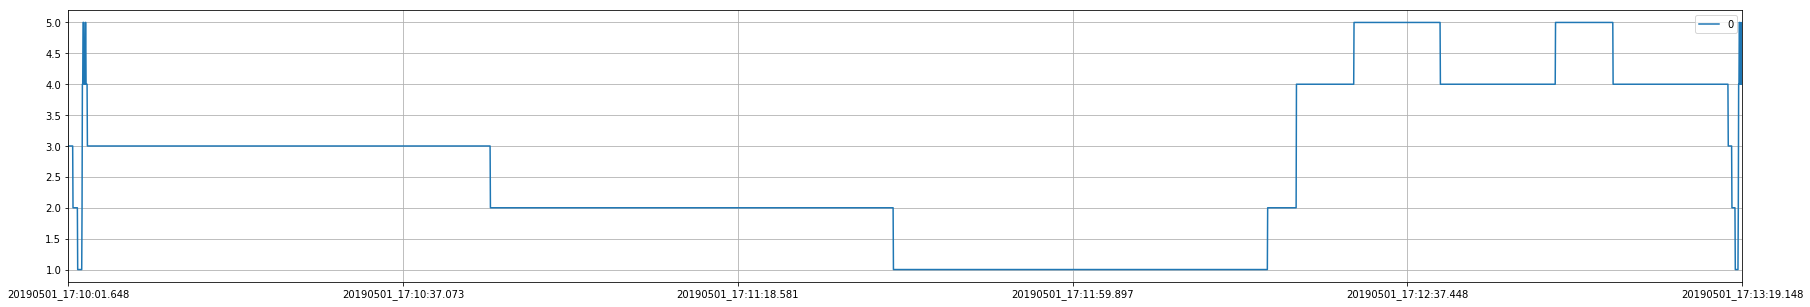

In [104]:
place_clusters.plot(figsize = (30,5),grid=1,xlim=[0,len(place_clusters)])

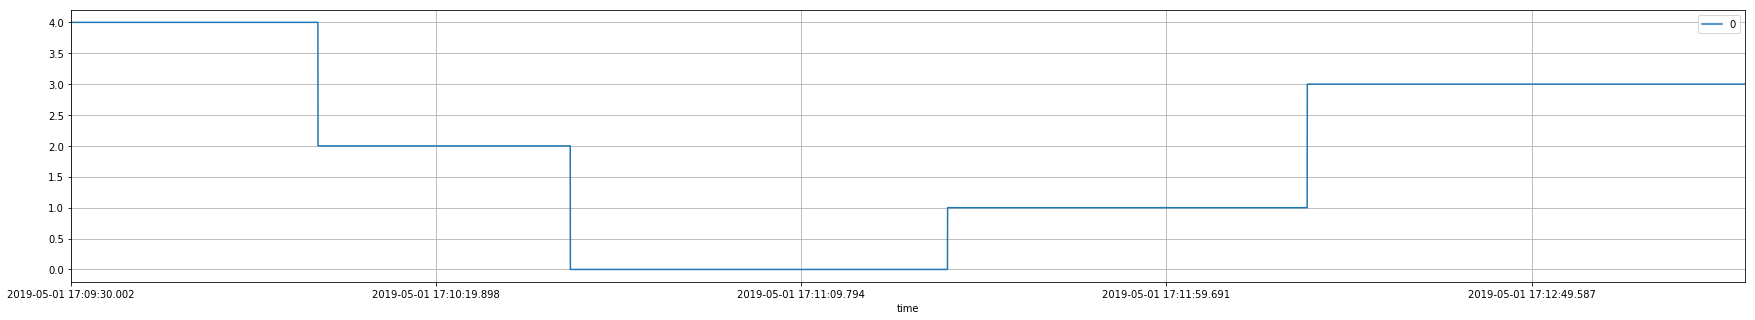

In [105]:
labels.plot(figsize = (30,5),grid=1,xlim=[0,len(labels)])

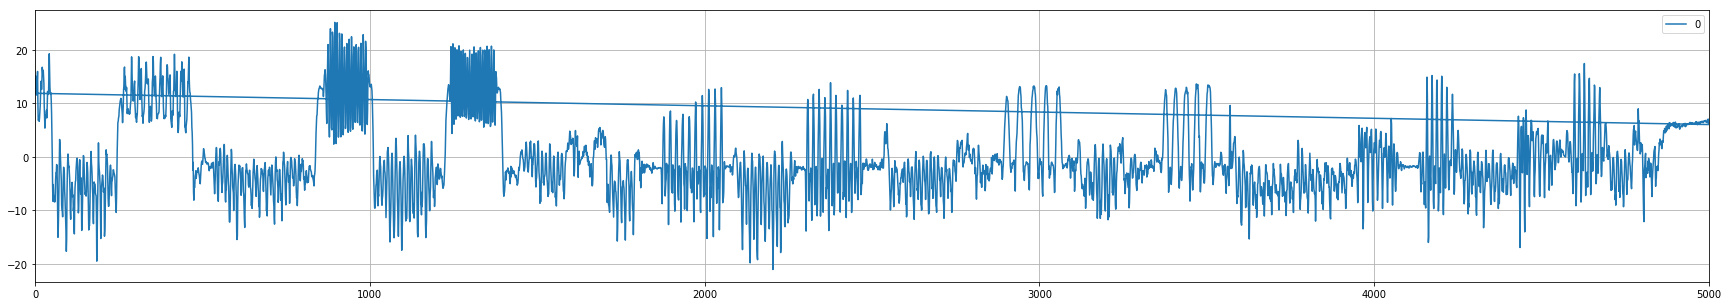

In [106]:
acc.plot(figsize = (30,5),grid=1,xlim=[0,len(acc)])

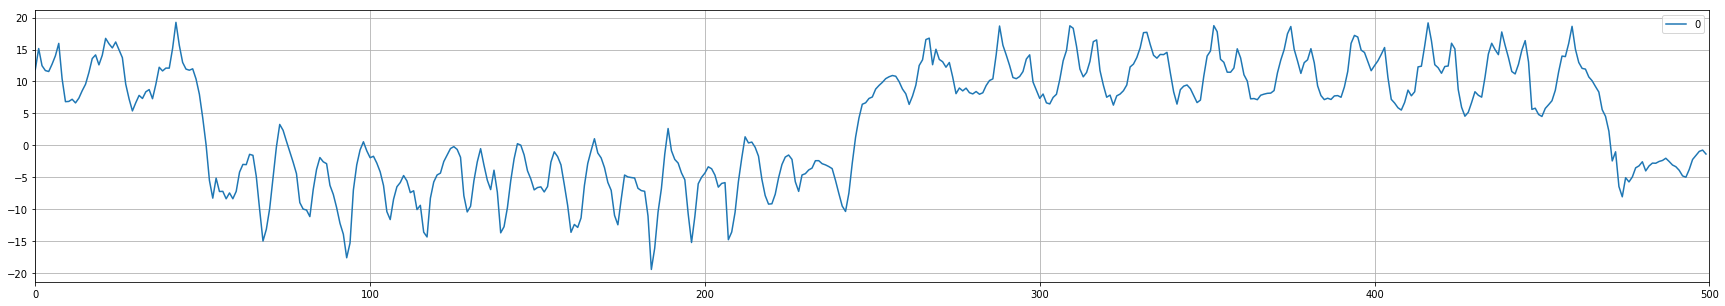

In [107]:
acc[0:500].plot(figsize = (30,5),grid=1,xlim=[0,500])

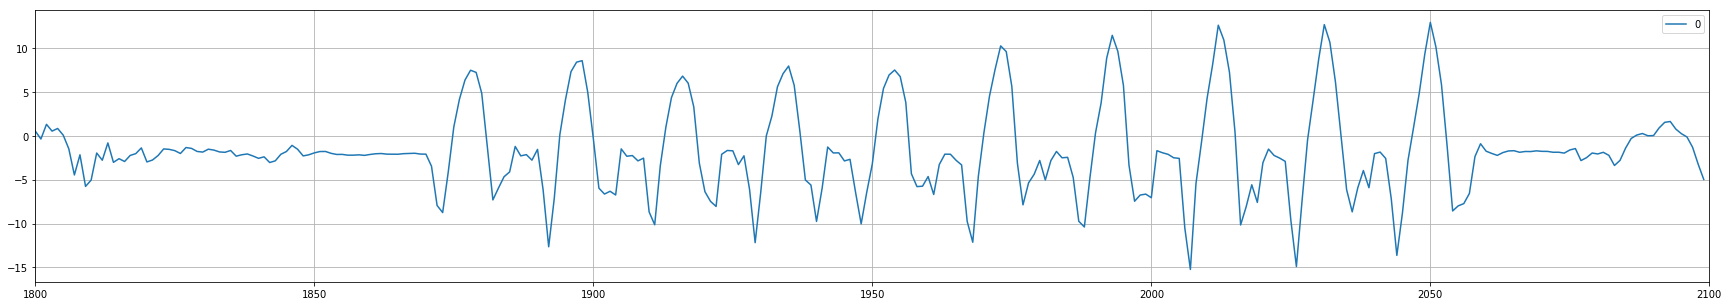

In [114]:
acc[1800:2100].plot(figsize = (30,5),grid=1,xlim=[1800,2100])

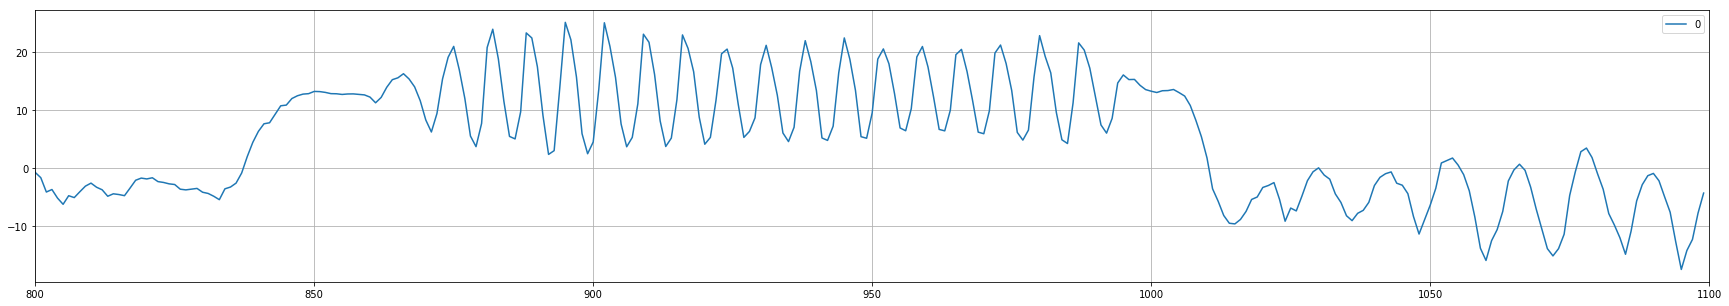

In [115]:
acc[800:1100].plot(figsize = (30,5),grid=1,xlim=[800,1100])

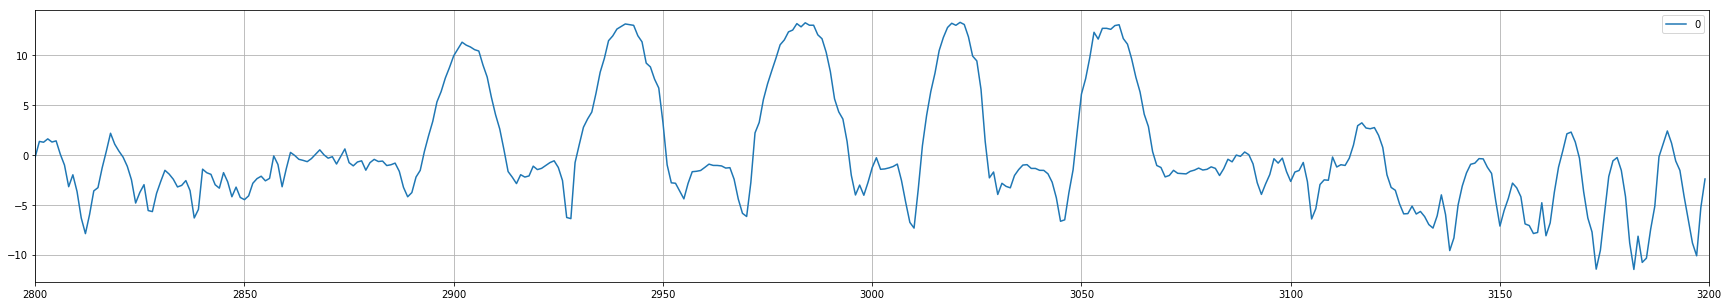

In [116]:
acc[2800:3200].plot(figsize = (30,5),grid=1,xlim=[2800,3200])

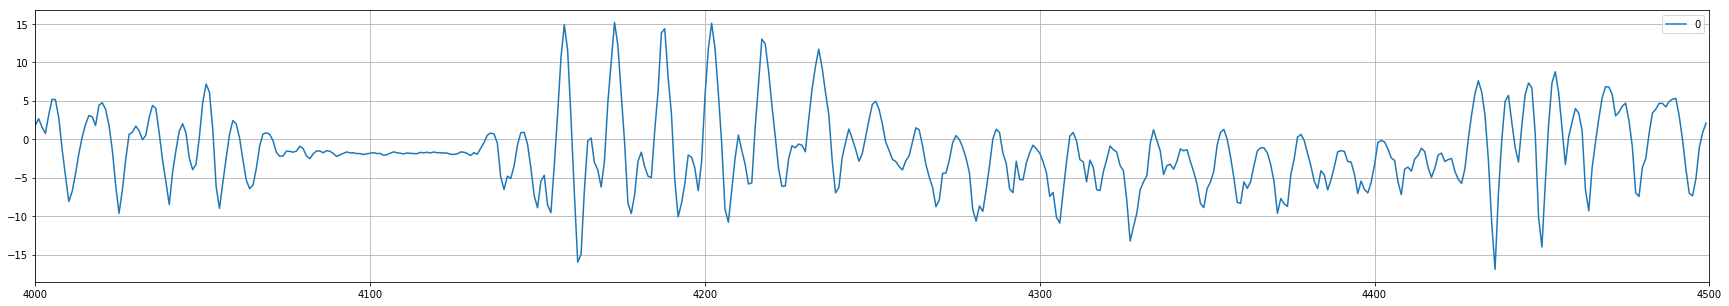

In [117]:
acc[4000:4500].plot(figsize = (30,5),grid=1,xlim=[4000,4500])

In [42]:
len(acc) == len(labels)

False

In [43]:
len(labels)

22920

In [44]:
len(place_clusters)

5001

In [45]:
len(labels)

22920

In [46]:
labels = labels.values

In [48]:
while len(acc)<=len(labels):
    samples_to_remove = len(labels) - len(acc)
    
    print len(labels)
    
    print "samples to remove", samples_to_remove
    #print "rmv_per_itr", rmv_per_itr
    
    if samples_to_remove > len(acc):
        labels = labels[1::2]
        
    elif samples_to_remove <= len(acc):
        rmv_per_itr = round(len(labels))/float(samples_to_remove)
        #for n in xrange(0,len(labels),len(labels)/samples_to_remove):
        #if len(acc)>=len(labels)-samples_to_remove:
        #    break
        labels = np.delete(labels, np.arange(0, labels.size, rmv_per_itr))
            #labels = labels.tolist().pop[n]      

 22920
samples to remove 17919
11460
samples to remove 6459
5730
samples to remove 729
5001
samples to remove 0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


ZeroDivisionError: float division by zero

In [49]:
rmv_per_itr = round(len(labels)/samples_to_remove)
print "rmv_per_itr", rmv_per_itr

ZeroDivisionError: integer division or modulo by zero

In [50]:
round(len(labels)/float(samples_to_remove))

ZeroDivisionError: float division by zero

In [51]:
#labels = np.append(labels,labels[-1])

In [52]:
len(labels)

5001

In [53]:
#rmv_per_itr = round(float(len(labels))/float(samples_to_remove))
labels = np.delete(labels, np.arange(0, labels.size, 7))

In [54]:
len(acc)

5001

In [55]:
labels = pd.DataFrame(labels,index=acc.index)

ValueError: Shape of passed values is (4286, 1), indices imply (5001, 1)

In [56]:
labels.plot(figsize = (30,5),grid=1,xlim=[0,len(labels)])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [57]:
place_clusters.index = acc.index

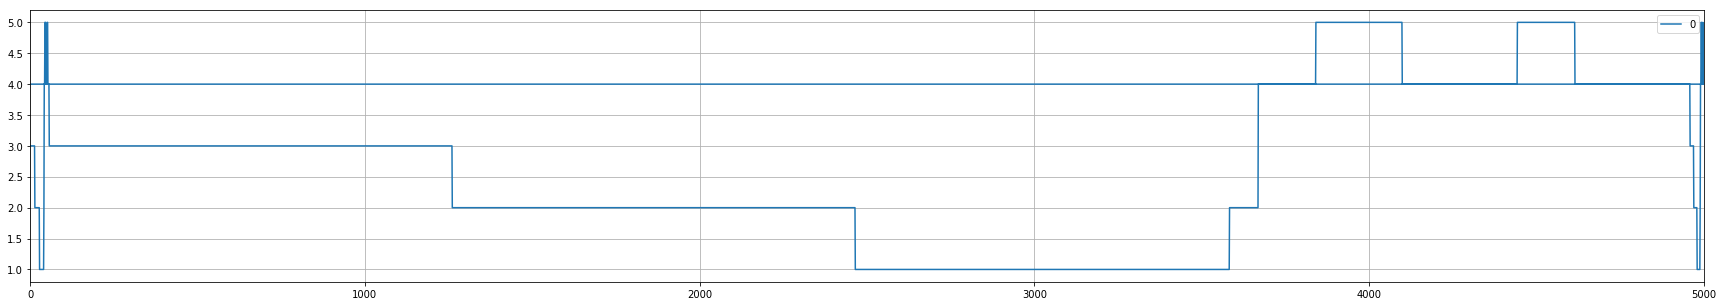

In [58]:
place_clusters.plot(figsize = (30,5),grid=1,xlim=[0,len(place_clusters)])

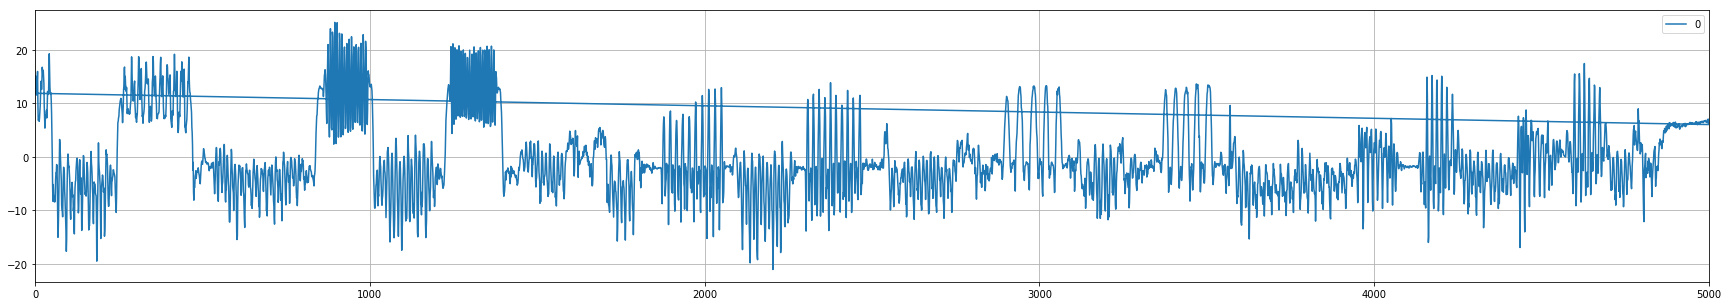

In [59]:
acc.plot(figsize = (30,5),grid=1,xlim=[0,len(acc)])

In [61]:
acc[90:150]

,0
90,-9.787189
91,-12.240991
92,-13.949303
93,-17.644023
94,-15.317527
95,-7.022370
96,-3.084626
97,-0.737209
98,0.543556
99,-0.877171


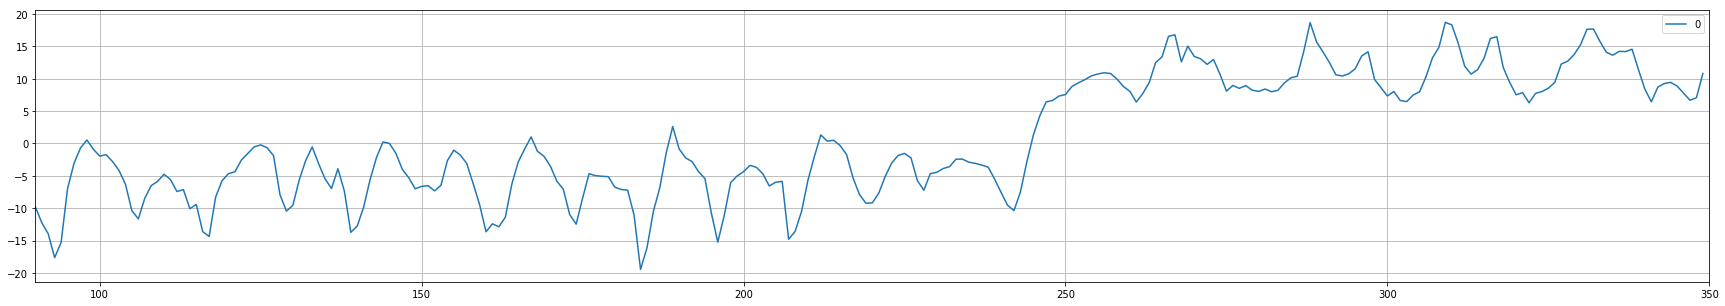

In [65]:
acc[90:350].plot(figsize = (30,5),grid=1,xlim=[90,350])

In [2414]:
#place_cluster.to_csv("env/" + session + "/dat/" + "place_cluster")
#acc.to_csv("env/" + session + "/dat/" + "acc")
#labels.to_csv("env/" + session + "/dat/" + "labels")